<a href="https://colab.research.google.com/github/johanhoffman/DD2363-VT19/blob/bozzato/Lab-3/bozzato_lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 3: Iterative methods**
**Bozzato Federico**

# **Abstract**

Short summary of the lab report. State the objectives, methods used, main results and conlusions. 

#**About the code**

A short statement on who is the author of the file, and if the code is distributed under a certain license. 

In [1]:
"""This program is a template for lab reports in the course"""
"""DD2363 Methods in Scientific Computing, """
"""KTH Royal Institute of Technology, Stockholm, Sweden."""

# Copyright (C) 2019 Johan Hoffman (jhoffman@kth.se)

# This file is part of the course DD2363 Methods in Scientific Computing
# KTH Royal Institute of Technology, Stockholm, Sweden
#
# This is free software: you can redistribute it and/or modify
# it under the terms of the GNU Lesser General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.

# This template is maintained by Johan Hoffman
# Please report problems to jhoffman@kth.se

'KTH Royal Institute of Technology, Stockholm, Sweden.'

# **Set up environment**

To have access to the neccessary modules you have to run this cell. If you need additional modules, this is where you add them. 

In [0]:
# Load neccessary modules.
from google.colab import files

import time
import sys
import math
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg

# **Introduction**

Give a short description of the problem investigated in the report, and provide some background information so that the reader can understand the context. 

Briefly describe what method you have chosen to solve the problem, and justify why you selected that method. 

Here you can express mathematics through Latex syntax, and use hyperlinks for references.

[Hyperlink to DD2363 course website.](https://kth.instructure.com/courses/7500)

$
{\displaystyle \frac{\partial u}{\partial t}} + u\cdot \nabla u +\nabla p = f, \quad \nabla \cdot u=0$



# **Methods**

## Mandatory assignment

### Jacobi iteration

In [0]:
# REFERENCE: https://en.wikipedia.org/wiki/Jacobi_method

def jacobiIteration(matrixA, b, initialPoint, tol=1e-5):
  '''
  Solves the system of linear equations matrixA * x = b, using the Jacobi
  iteration.
  Parameters:
  - matrixA: n x n matrix
  - b: n x 1 vector
  - initialPoint: starting guess for the iteration
  - tol (default= 1e-5): tolerance to stop the iterations
  Output:
  - x: n x 1 vector, solution of matrixA * x = b
  - residuals: vector containing all the residuals for each iteration
  - wres: normalized residuals
  
  '''
  ############################################
  ##           ITERATION MATRIX             ##
  ############################################
  def iterationMatrix(matrixA,b):                                               
    if not isinstance(matrixA,np.ndarray):
      matrixA= np.array(matrixA) 
    
    D= np.diag(matrixA)
    invD= np.diag([1/D[i] for i in range(0,matrixA.shape[0])])
    D= np.diag(D)
    E= matrixA - D
    M= -np.dot(invD,E)
    
    return M, D, E, invD
  
  ############################################
  ##           PERMUTATION MATRIX           ##
  ############################################
  def permutation(matrixA):                                      
    if not isinstance(matrixA,np.ndarray):
      matrixA= np.array(matrixA)
    
    indeces= []
    n= matrixA.shape[0]
    for i in range(0,n):
      ind= np.argmax(matrixA[:,i])                      # the permutation is done
      if ind not in indeces:                            # in order to obtain a
        indeces.append(ind)                             # diagonally dominant matrix 

    perm= np.zeros((n,n))
    for i in range(0,n):
      perm[i,indeces[i]]= 1
      
    return perm
   
  ############################################
  ##            JACOBI ITERATION            ##
  ############################################
  if not isinstance(matrixA,np.ndarray):
    matrixA= np.array(matrixA)
    
  n= matrixA.shape[0]
  
  # M = -invD * (A - D) = -invD * E
  # D = diag(A)
  # E = A - D
  # c = invD * b
  M, D, E, invD= iterationMatrix(matrixA,b)
  c= np.dot(invD,b)
    
  
  # convergence if rho(M)<1
  eigvals,_= np.linalg.eig(M)
  
  if np.around(max(np.absolute(eigvals))) >= 1:         # rho(M) >= 1
    perm= permutation(matrixA)                          # try to permutation of matrixA
                                                        # in order to get a diagonally
    matrixA= np.dot(perm,matrixA)                       # dominant matrix
    b= np.dot(perm,b)

    M, D, E, invD= iterationMatrix(matrixA,b)           # calculate again M, ...
    c= np.dot(invD,b)

    eigvals,_= np.linalg.eig(M)                         # new eigenvalues BUT THE 
                                                        # SOLUTIONS OF THE SYSTEM
                                                        # DON'T CHANGE
    
    if np.around(max(np.absolute(eigvals))) >= 1:
      print('Convergence will not be reached because rho(I-invD*A)>=1.\nTry other methods.')
      sys.exit(1)

  # we are sure that the algorithm converges. Now we can find x
  x= initialPoint
  res = b - np.dot(matrixA,x)    
  res= linalg.norm(res)
  norm_b= linalg.norm(b)
  residuals= []
  it= 1
  while res/norm_b > tol:
    x= np.dot(M,x) + c
    
    res = b - np.dot(matrixA,x)    
    res= linalg.norm(res)
    residuals.append(res)
    it+= 1
  
  print('solution after {} iterations'.format(it))
  return x, np.array(residuals), np.array(residuals / norm_b)

### Gauss-Seidel iteration

In [0]:
def gaussSeidelIteration(matrixA ,b, initialPoint, tol=1e-5):
  '''
  Solves the system of linear equations matrixA * x = b, using the Gauss - Seidel
  iteration.
  Parameters:
  - matrixA: n x n matrix
  - b: n x 1 vector
  - initialPoint: starting guess for the iteration
  - tol (default= 1e-5): tolerance to stop the iterations
  Output:
  - x: n x 1 vector, solution of matrixA * x = b
  - residuals: vector containing all the residuals for each iteration
  - wres: normalized residuals
  '''
  
  ############################################
  ##           ITERATION MATRIX             ##
  ############################################
  def iterationMatrix(matrixA):
    if not isinstance(matrixA,np.ndarray):
      matrixA= np.array(matrixA) 
    
    # split matrixA= L + U
    L= np.tril(matrixA)
    U= np.triu(matrixA,1)
    
    invL= linalg.inv(L)
    M= -np.dot(invL,U)
    
    return M, L, U, invL
  
  ############################################
  ##           PERMUTATION MATRIX           ##
  ############################################
  def permutation(matrixA):                                      
    if not isinstance(matrixA,np.ndarray):
      matrixA= np.array(matrixA)
    
    indeces= []
    n= matrixA.shape[0]
    for i in range(0,n):
      ind= np.argmax(matrixA[:,i])                      # the permutation is done
      if ind not in indeces:                            # in order to obtain a
        indeces.append(ind)                             # diagonally dominant matrix 

    perm= np.zeros((n,n))
    for i in range(0,n):
      perm[i,indeces[i]]= 1
      
    return perm
  
  ############################################
  ##       GAUSS - SEIDEL ITERATION         ##
  ############################################
  if not isinstance(matrixA,np.ndarray):
    matrixA= np.array(matrixA)
  
  n= matrixA.shape[0]
  
  # M = -invL * (A - L) = -invL * U
  # L = lowerTriangular(A)
  # U = A - L
  # c = invL * b
  M, L, U, invL= iterationMatrix(matrixA)
  c= np.dot(invL,b)
  
  # convergence if rho(M)<1
  eigvals,_= np.linalg.eig(M)
  if np.around(max(np.absolute(eigvals))) >= 1:         # rho(M) >= 1
    perm= permutation(matrixA)                          # try to permutation of matrixA
                                                        # in order to get a diagonally
    matrixA= np.dot(perm,matrixA)                       # dominant matrix
    b= np.dot(perm,b)

    M, L, U, invL= iterationMatrix(matrixA)             # calculate again M, ...
    c= np.dot(invL,b)

    eigvals,_= np.linalg.eig(M)                         # new eigenvalues BUT THE 
                                                        # SOLUTIONS OF THE SYSTEM
                                                        # DON'T CHANGE
  
    
    if np.around(max(np.absolute(eigvals))) >= 1:
      print('Convergence will not be reached because rho(I-invD*A)>=1.\nTry other methods.')
      sys.exit(1)

    
  # we are sure that the algorithm converges. Now we can find x
  x= initialPoint
  residuals= []
  res = b - np.dot(matrixA,x)    # initial residual -> just to enter in the loop
  res= linalg.norm(res)
  norm_b= linalg.norm(b)
  it= 1
  while res/norm_b > tol:
    x= np.dot(M,x) + c
    
    res = b - np.dot(matrixA,x)    
    res= linalg.norm(res)
    residuals.append(res)
    it+= 1
  
  print('solution after {} iterations'.format(it))
  return x, np.array(residuals), np.array(residuals / norm_b)
  

### Newton's method for scalar nonlinear equation

In [0]:
def derivative(fun,point):
  '''
  Calculates the first order derivative of the function @fun at the point @point.
  Parameters:
  - fun: function for which the 1st order derivative is wanted
  - point: point where to calculate the derivative
  Output:
  - derivative: central 1st order derivative
  '''
  return (fun(point+1) - fun(point-1)) / 2               # central derivative f'= (f(x+1) - f(x-1))/2




def newtonScalarNLeq(fun,point,tol= 1e-5):
  '''
  Solve the scalar nonlinear equation f(x) = 0, where f(x) is the function @fun.
  The method used is Newton's method.
  Parameters:
  - fun: function 
  - point: starting guess for the iteration
  - tol (default= 1e-5): tolerance to stop the iterations
  Output:
  - x: point x such that f(x)=0
  - residuals: vector containing all the residuals for each iteration
  '''
  
  
  if not callable(fun):
    print('Error: impossible to continue! Parameter @fun is not callable()')
    
  # loop until convergence is not reached
  residuals= []
  x= point
  res= np.absolute(fun(x))
  residuals.append(res)
  k= 1
  while res >= tol:
    alpha= derivative(fun,x)
    x= x - fun(x)/alpha
    res= np.absolute(fun(x))
    residuals.append(res)
    k+= 1
    
  print('solution after {} iterations'.format(k))
  return x, np.array(residuals)


## Extra assignment

### GMRES method

In [0]:
def GMRESiteration(matrixA, b, tol=1e-5):
  
  ######################################
  ##             ARNOLDI              ##
  ######################################
  def arnoldiIteration(matrixA, Q, K):
    if not isinstance(matrixA, np.ndarray):
      matrixA= np.array(matrixA)
    
    if not isinstance(Q, np.ndarray):
      Q= np.array(Q)
  
    vect_h= np.zeros((K+1,1))
    q= np.dot(matrixA, Q[:,K-1])  
    
    for k in range(0,K):
      vect_h[k]= np.inner(Q[:,k],q)
      q= q - vect_h[k]*Q[:,k]
      
    vect_h[K]= linalg.norm(q)
    q= q / vect_h[K]
  
    return vect_h, q
  
  ######################################
  ##              GMRES               ##
  ######################################
  if not isinstance(matrixA,np.ndarray):
    matrixA= np.array(matrixA)
    
  if not isinstance(b,np.ndarray):
    b= np.array(b)
  
  n= matrixA.shape[0]
  k= 1
  Q= np.zeros((n,1))
  Q[:]= b / linalg.norm(b)
  res_0= linalg.norm(b)
  res= res_0
  residuals= []
  residuals.append(res)
  
  while res / res_0 >= tol:
    h_new, q_new= arnoldiIteration(matrixA, Q, k)
    
    # update H
    if k == 1:
      H= h_new
    else:
      H_new= np.zeros((k+1,k))
      H_new[0:k,0:k-1]= H
      H_new[:,k-1]= h_new.T
      H= H_new
    
    
    ########### LEAST SQUARES ###############
    # least square of (|b|e_1 - H_ky)
    e_1= np.zeros((k+1,1))
    e_1[0]= linalg.norm(b)
    
    y,_,_,_= linalg.lstsq(H,e_1,rcond=None)
    
    x= np.dot(Q,y)
    
    # update Q
    Q_new= np.zeros((n,k+1))
    Q_new[:,0:k]= Q
    Q_new[:,k]= q_new
    Q= Q_new
    
    # residual
    res= b - np.dot(A,x)
    res= linalg.norm(res)
    residuals.append(res)
    
    k+= 1
  
  print('solution after {} iterations'.format(k))
  return x, np.array(residuals), np.array(residuals/res_0)
  

### Newton's method for vector nonlinear equation

In [0]:
def jacobian(fun,point):
  n= len(point)
  
  jacobian= np.zeros((n,n))
  
  for i in range(0,n):
    pp1= [p for p in point]
    pp2= [p for p in point]
    
    pp1[i]= pp1[i] + 0.1
    pp2[i]= pp2[i] - 0.1
    
    jacobian[:,i]= ((fun(pp1) - fun(pp2)) / 0.2).T
  
  return jacobian
  
  
  
  
def newtonNLsystems(fun,initialPoint,tol= 1e-5):
  if not callable(fun):
    print('Error: impossible to continue! Parameter @fun is not callable()')
    
  n= len(initialPoint) 
  x= np.array(initialPoint)
  
  k = 1
  residuals= []
  res = linalg.norm(fun(x))
  residuals.append(res)
  while res >= tol:
    jac= jacobian(fun,x)
    
    b= - fun(x)
    
    dx, _, _, _ = linalg.lstsq(jac, b, rcond=None)
    x = x + dx
    
    res = linalg.norm(fun(x))
    residuals.append(res)
    k+= 1
    
  print('solution after {} iterations'.format(k))
  return x, np.array(residuals)

# **Results**

## Jacobi iteration

solution after 19 iterations
x.T= [[1. 2. 3.]]
res= [8.44660265e+00 2.16580594e+00 7.06921742e-01 1.96416773e-01
 3.83156523e-02 1.37248195e-02 4.50260464e-03 7.26749448e-04
 2.74462498e-04 1.02109998e-04 1.54653646e-05 5.83627522e-06
 2.30680198e-06 3.66009710e-07 1.33768980e-07 5.23113707e-08
 9.18576769e-09 3.25043704e-09]


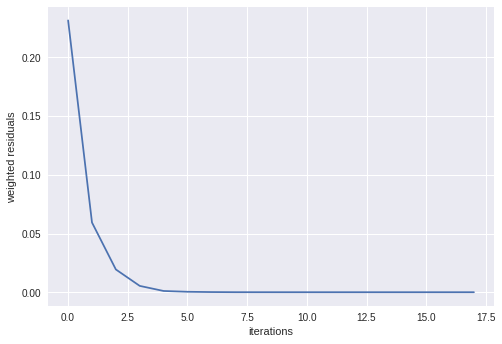

--------------------------------------------------------------
--------------------------------------------------------------
Convergence will not be reached because rho(I-invD*A)>=1.
Try other methods.


SystemExit: ignored

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2890: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [18]:
#TODO: moving this cell to Result section and add examples
# ex taken from https://s-mat-pcs.oulu.fi/~mpa/matreng/et55_60.htm

A= [[2,  7,  1],
    [4,  1, -1],
    [1, -3, 12]]

b= [[19],
    [ 3],
    [31]]

x, res, wres= jacobiIteration(A,b,[[0],[0],[0]],1e-10)
print('x.T=',x.T)
print('res=', res)

plt.figure
plt.plot([x for x in range(0,len(res))],wres)
plt.xlabel('iterations')
plt.ylabel('weighted residuals')
plt.show()

print('--------------------------------------------------------------')
print('--------------------------------------------------------------')
A= [[2,  1, 1],
    [1,  2, 1],
    [1,  1, 2]]

b= [[ 4],
    [ 4],
    [ 4]]

x, res, wres= jacobiIteration(A,b,[[0],[0],[0]],1e-10)
print('x.T=',x.T)
print('res=', res)

plt.figure
plt.plot([x for x in range(0,len(res))],wres)
plt.xlabel('iterations')
plt.ylabel('weighted residuals')
plt.show()

## Gauss-Seidel iteration

solution after 10 iterations
x.T= [[1. 2. 3.]]
res= [3.21144330e+00 3.83623487e-01 9.43931838e-03 1.14331737e-03
 2.80661260e-05 3.39935543e-06 8.44227239e-08 1.00830844e-08
 2.56688016e-10]


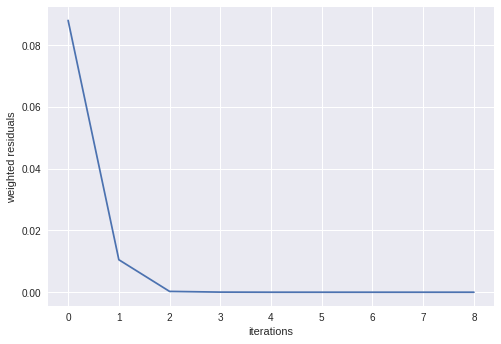

--------------------------------------------------------------
--------------------------------------------------------------
solution after 23 iterations
x.T= [[1. 1. 1.]]
res= [1.58113883e+00 5.37645329e-01 1.58191068e-01 4.39561619e-02
 1.57134414e-02 7.09285898e-03 2.98976518e-03 1.08912222e-03
 3.41390423e-04 9.50325041e-05 2.90850418e-05 1.23479192e-05
 5.48190801e-06 2.13824443e-06 7.17257807e-07 2.08661048e-07
 5.84241826e-08 2.15832677e-08 9.76939003e-09 4.06829453e-09
 1.46193844e-09 4.52297633e-10]


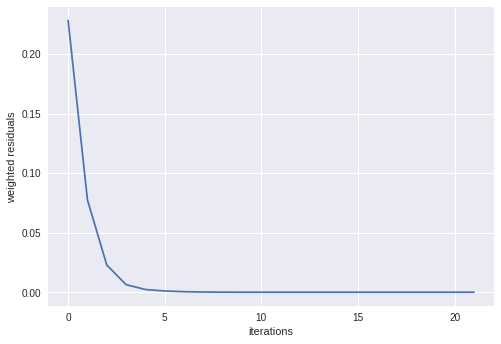

In [27]:
# ex taken from https://s-mat-pcs.oulu.fi/~mpa/matreng/et55_60.htm

A= [[2,  7,  1],
    [4,  1, -1],
    [1, -3, 12]]

b= [[19],
    [ 3],
    [31]]

x, res, wres= gaussSeidelIteration(A,b,[[0],[0],[0]],1e-10)
print('x.T=',x.T)
print('res=', res)

plt.figure
plt.plot([x for x in range(0,len(res))],wres)
plt.xlabel('iterations')
plt.ylabel('weighted residuals')
plt.show()

print('--------------------------------------------------------------')
print('--------------------------------------------------------------')
A= [[2,  1, 1],
    [1,  2, 1],
    [1,  1, 2]]

b= [[ 4],
    [ 4],
    [ 4]]

x, res, wres= gaussSeidelIteration(A,b,[[0],[0],[0]],1e-10)
print('x.T=',x.T)
print('res=', res)

plt.figure
plt.plot([x for x in range(0,len(res))],wres)
plt.xlabel('iterations')
plt.ylabel('weighted residuals')
plt.show()

## Newton's method for scalar nonlinear equation

solution after 4 iterations
f(x=-1.8414029104271352)= -2.3138732336835943e-06
res=  [1.35335283e-01 1.96539106e-03 6.77770331e-05 2.31387323e-06]


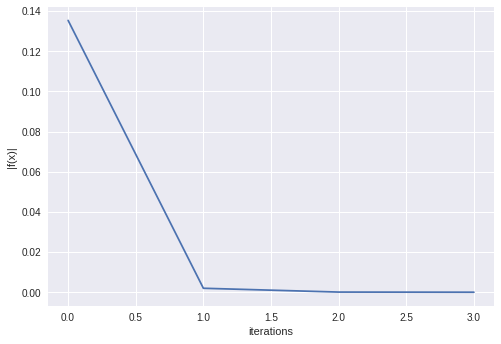

In [30]:
def f(x):
  return np.e**x -x - 2

x, res= newtonScalarNLeq(f,-2)

print('f(x={})= {}'.format(x,f(x)))
print('res= ',res)
plt.figure()
plt.plot([x for x in range(0,len(res))],res)
plt.xlabel('iterations')
plt.ylabel('|f(x)|')

plt.show()

## GMRES method

solution after 4 iterations
x.T= [[1. 2. 3.]]
res= [3.64828727e+01 1.14492068e+01 1.12371389e+01 1.91782793e-14]


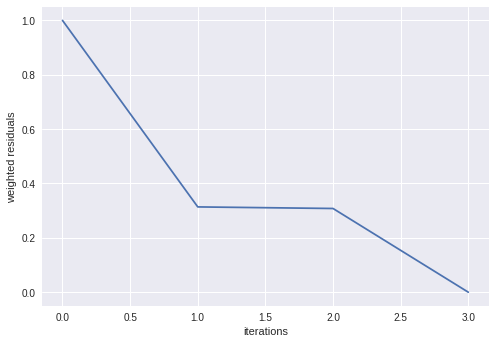

--------------------------------------------------------------
--------------------------------------------------------------
solution after 2 iterations
x.T= [[1. 1. 1.]]
res= [6.92820323e+00 1.53837015e-15]


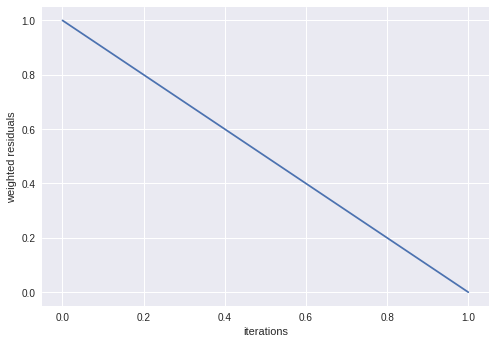

In [11]:
A= [[2,  7,  1],
    [4,  1, -1],
    [1, -3, 12]]

b= [[19],
    [ 3],
    [31]]

x, res, wres= GMRESiteration(A,b,tol=1e-10)
print('x.T=',x.T)
print('res=', res)

plt.figure
plt.plot([x for x in range(0,len(res))],wres)
plt.xlabel('iterations')
plt.ylabel('weighted residuals')
plt.show()

print('--------------------------------------------------------------')
print('--------------------------------------------------------------')
A= [[2,  1, 1],
    [1,  2, 1],
    [1,  1, 2]]

b= [[ 4],
    [ 4],
    [ 4]]

x, res, wres= GMRESiteration(A,b,tol=1e-10)
print('x.T=',x.T)
print('res=', res)

plt.figure
plt.plot([x for x in range(0,len(res))],wres)
plt.xlabel('iterations')
plt.ylabel('weighted residuals')
plt.show()

## Newton's method for vector nonlinear equation

solution after 8 iterations
x.T= [[ -2.          2.        147.4131591]]
res= [9.53853474e+00 3.82241562e+00 1.68528861e+00 4.62886030e-01
 4.65127911e-02 5.32625100e-04 7.09904100e-08 1.24344979e-14]


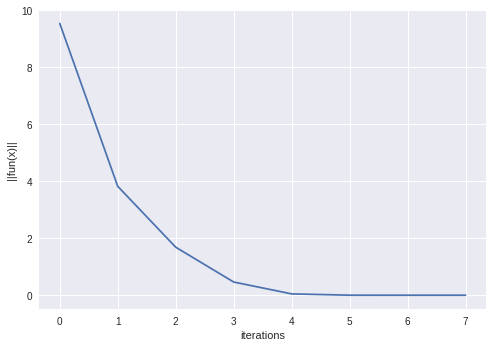

In [12]:
def funVect(var):
  if not isinstance(var,np.ndarray):
    var= np.array(var)
  
  fun1= var[0]*var[1] + 2*var[1]
  fun2= var[0] + var[1]
  fun3= var[1]*math.log(var[2]+1) - 10
  
  vect= [fun1,
         fun2,
         fun3]
  
  vect= np.array(vect)
  
  return vect

x, res= newtonNLsystems(funVect,[[1],[2],[4]],tol=1e-10)

print('x.T=',x.T)
print('res=', res)

plt.figure()
plt.plot([x for x in range(0,len(res))],res)
plt.xlabel('iterations')
plt.ylabel('||fun(x)||')
plt.show()

# **Discussion**

Summarize your results and your conclusions. Were the results expected or surprising. Do your results have implications outside the particular problem investigated in this report? 

# References

In this appendix some examples are given to express and visualizing mathematical concepts such as vectors, matrices, meshes and functions. 

This is not part of the template report for the course.